In [ ]:
import numpy as np

data_path = "../output/ml_training_dataset.npz"
data = np.load(data_path, mmap_mode='r')

waveforms = data['waveforms']                      # (N, T)
photon_times = data['photon_times_detected_jittered']  # (N, K)
time_axis = data['time_axis']                      # (T,)

N, T = waveforms.shape
rng = np.random.default_rng(42)
idx = rng.permutation(N)
n_train = int(0.7 * N)
n_val = int(0.2 * N)
n_test = N - n_train - n_val

train_idx = idx[:n_train]
val_idx   = idx[n_train:n_train+n_val]
test_idx  = idx[n_train+n_val:]

print(f"Total: events={N}, waveform shape=({N}, {T})")
print(f"Train: events={len(train_idx)}, waveform shape=({len(train_idx)}, {T})")
print(f"Valid: events={len(val_idx)}, waveform shape=({len(val_idx)}, {T})")
print(f"Test:  events={len(test_idx)}, waveform shape=({len(test_idx)}, {T})")

Total: events=112847, waveform shape=(112847, 1021)
Train: events=78992, waveform shape=(78992, 1021)
Valid: events=22569, waveform shape=(22569, 1021)
Test:  events=11286, waveform shape=(11286, 1021)


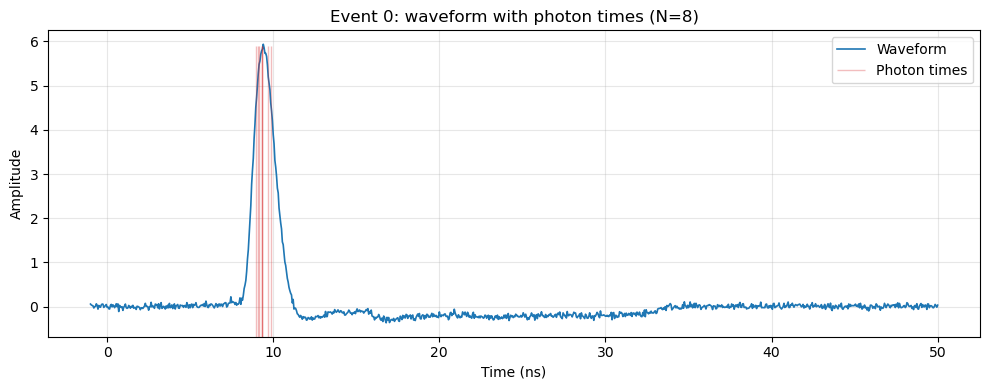

In [8]:
import matplotlib.pyplot as plt
I = 0  # change to the event index you want to inspect

w = waveforms[I]
t = time_axis
pt = photon_times[I]
pt = pt[~np.isnan(pt)]

fig, ax = plt.subplots(figsize=(10, 4))
line_wf, = ax.plot(t, w, lw=1.2, color='tab:blue', label='Waveform')
yl = ax.get_ylim()
if pt.size > 0:
    ax.vlines(pt, yl[0], yl[0] + 0.95*(yl[1]-yl[0]), color='tab:red', alpha=0.3, lw=1, label='Photon times')
    ax.set_ylim(yl)  # keep original y-limits

ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude')
ax.set_title(f'Event {I}: waveform with photon times (N={pt.size})')
ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

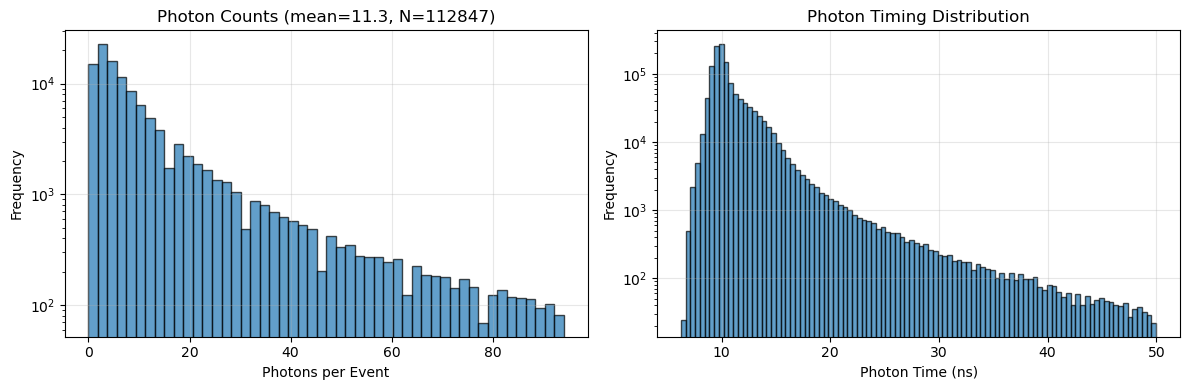

In [9]:
import matplotlib.pyplot as plt

counts = np.sum(~np.isnan(photon_times), axis=1)
all_times = photon_times[~np.isnan(photon_times)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(counts, bins=50, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Photons per Event')
ax1.set_ylabel('Frequency')
ax1.set_yscale('log')
ax1.set_title(f'Photon Counts (mean={counts.mean():.1f}, N={len(counts)})')
ax1.grid(True, alpha=0.3)

ax2.hist(all_times, bins=100, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Photon Time (ns)')
ax2.set_ylabel('Frequency')
ax2.set_yscale('log')
ax2.set_title('Photon Timing Distribution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()